In [87]:
# Data Loading
import pandas as pd
import numpy as np
df= pd.read_csv('winequalityN - winequalityN.csv')
df.head()
df.shape

(6497, 13)

In [35]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [37]:
# checking duplicate data
df.duplicated().sum()

1168

In [38]:
## # We need to remove duplicated rows and missing value rows
import pandas as pd

# drop duplicate row

df1=df.drop_duplicates(inplace= True)

## remove missing row

df1=df.dropna()


In [39]:
df1.shape

(5295, 13)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier


In [41]:
X= df1.drop('type',axis=1)
y= df1['type']

In [42]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6490,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6491,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [44]:
#Standardize the feature
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [45]:
X_train_scaled

array([[ 0.14744563, -1.08779389,  1.15909326, ..., -0.421996  ,
         0.55008938,  0.22620112],
       [-1.15655863, -0.49398917, -0.13186424, ..., -0.08882885,
         1.65441124,  1.38203698],
       [-0.46620343, -0.4346087 ,  0.07197115, ..., -0.48862944,
         0.1253502 , -0.92963475],
       ...,
       [-1.46338316,  0.75300073, -1.42282174, ...,  2.30997469,
         2.5605215 ,  1.38203698],
       [-0.8497341 , -0.13770634, -0.4715899 , ...,  2.90967558,
         0.04040236, -0.92963475],
       [-0.08267277, -1.14717436,  0.13991628, ..., -0.08882885,
        -1.0639195 ,  1.38203698]])

In [54]:
## train KNN without PCA
knn_no_pca = KNeighborsClassifier(n_neighbors= 5)
knn_no_pca.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [55]:
y_pred_no_pca = knn_no_pca.predict(X_test_scaled)

## evaluate accuracy
accuracy_no_pca = accuracy_score(y_test,y_pred_no_pca)


In [56]:
accuracy_no_pca

0.9924457034938622

In [109]:
##Applying PCA
pca = PCA(n_components=3)
X_train_pca= pca.fit_transform(X_train_scaled)
X_test_pca= pca.fit_transform(X_test_scaled)

# Train KNN
knn_with_pca = KNeighborsClassifier(n_neighbors=5)
knn_with_pca.fit(X_train_pca,y_train)

#predict
y_pred_pca = knn_with_pca.predict(X_test_pca)

#accuracy
accuracy_pca = accuracy_score(y_test,y_pred_pca)

In [110]:
accuracy_pca

0.9763928234183191

In [68]:
# find optimum value of pca
for i in range(1,12):            #there is total 12 components
    pca = PCA(n_components=i)
    X_train_pca= pca.fit_transform(X_train_scaled)
    X_test_pca= pca.fit_transform(X_test_scaled)

    knn_with_pca = KNeighborsClassifier()
    knn_with_pca.fit(X_train_pca,y_train)


    y_pred_pca = knn_with_pca.predict(X_test_pca)

    print(accuracy_score(y_test,y_pred_pca))

0.9754485363550519
0.9763928234183191
0.9763928234183191
0.959395656279509
0.9575070821529745
0.9537299338999056
0.9546742209631728
0.9527856468366384
0.959395656279509
0.9612842304060434
0.9575070821529745


In [73]:
pca= PCA(n_components=2)  #2D

X_train_pca= pca.fit_transform(X_train_scaled)
X_test_pca= pca.fit_transform(X_test_scaled)


In [74]:
X_train_pca

array([[-0.77094542, -0.96872797],
       [-0.85943914, -2.99625952],
       [-0.81473972, -0.55309941],
       ...,
       [ 1.11810261, -3.48293183],
       [ 2.00004179, -0.28831498],
       [-0.68368454, -0.06696754]])

In [76]:
## eigen values
pca.explained_variance_

array([2.93997207, 2.57653271])

In [81]:
#eigen vectors
pca.components_

array([[ 0.29789859,  0.38020407, -0.09279602, -0.29653356,  0.31835951,
        -0.42763173, -0.45981961,  0.16894251,  0.16958062,  0.32910611,
         0.01081413, -0.09367692],
       [ 0.24089605,  0.06447744,  0.170712  ,  0.35761034,  0.24671942,
         0.18222064,  0.20475517,  0.54302351, -0.18677202,  0.1171539 ,
        -0.4756939 , -0.27389131]])

In [80]:
pca.components_.shape

(2, 12)

In [82]:
## optimum value of pca
pca.explained_variance_ratio_

array([0.24476632, 0.21450831])

In [83]:
pca= PCA(n_components= None)
X_train_trf= pca.fit_transform(X_train_scaled)
X_test_trf= pca.fit_transform(X_test_scaled)

In [84]:
pca.explained_variance_ratio_

array([0.24476632, 0.21450831, 0.14766955, 0.08774461, 0.07033774,
       0.05840026, 0.04756141, 0.0437106 , 0.03835489, 0.02529273,
       0.01887277, 0.00278081])

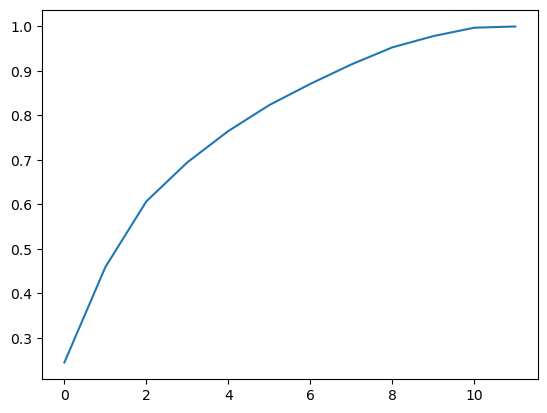

In [89]:
# apply cumulative sum to where it meet the 90% and that no. is our optimum pc
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [90]:
## 90% value meet around 6 so 6 is our optimum pc